In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
dbpedia_df = pd.read_csv("../datasets/dbpedia.csv", sep="|")
dbpedia_df.dropna(subset=['question',
                           'question_de',
                           'question_fr',
                           'question_es',
                           'question_ru'], inplace=True)  

In [29]:
dbpedia_df.head()

,id,question,question_de,question_fr,question_es,question_ru,question_r_de,question_r_ru,category,type_1,type_2,type_3,type_4,type_5
0,dbpedia_1177,Was Jacqueline Kennedy Onassis a follower of M...,War Jacqueline Kennedy Onassis eine Anhängerin...,Jacqueline Kennedy Onassis était-elle une adep...,¿Jacqueline Kennedy Onassis fue seguidora de l...,Была ли Жаклин Кеннеди Онассис последователем ...,Was Jacqueline Kennedy Onassis a supporter of ...,Was Jacqueline Kennedy Onassis a follower of t...,boolean,boolean,NaN,NaN,NaN,NaN
1,dbpedia_14427,What is the name of the opera based on Twelfth...,"Wie heißt die Oper, die auf Twelfth Night basi...",Quel est le nom de l&#39;opéra basé sur Twelft...,¿Cuál es el nombre de la ópera basada en Noche...,Как называется опера по мотивам «Двенадцатой н...,What is the name of the opera based on Twelfth...,What is the name of the opera based on Twelfth...,resource,dbo:Work,dbo:MusicalWork,dbo:Opera,NaN,NaN
2,dbpedia_16615,When did Lena Horne receive the Grammy Award f...,Wann erhielt Lena Horne den Grammy Award für d...,Quand Lena Horne a-t-elle reçu le Grammy Award...,¿Cuándo recibió Lena Horne el premio Grammy al...,Когда Лена Хорн получила премию Грэмми за лучш...,When did Lena Horne receive the Grammy Award f...,When did Lena Horn receive the Grammy Award fo...,literal,date,NaN,NaN,NaN,NaN
3,dbpedia_23480,Do Prince Harry and Prince William have the sa...,Haben Prinz Harry und Prinz William die gleich...,Le prince Harry et le prince William ont-ils l...,¿El príncipe Harry y el príncipe William tiene...,У принца Гарри и принца Уильяма одни и те же р...,Do Prince Harry and Prince William have the sa...,Do Prince Harry and Prince William have the sa...,boolean,boolean,NaN,NaN,NaN,NaN
4,dbpedia_3681,What is the subsidiary company working for Leo...,"Was ist die Tochtergesellschaft, die für Leona...",Quelle est la filiale qui travaille pour Leona...,¿Cuál es la empresa subsidiaria que trabaja pa...,Какая дочерняя компания работает у Леонарда Ма...,What is the subsidiary that works for Leonard ...,Which subsidiary does Leonard Maltin have?,resource,dbo:Agent,dbo:Organisation,dbo:EducationalInstitution,NaN,NaN


In [30]:
print("0.95 percentie of question's length =", dbpedia_df.question.str.len().quantile(.95))

0.95 percentie of question's length = 97.0


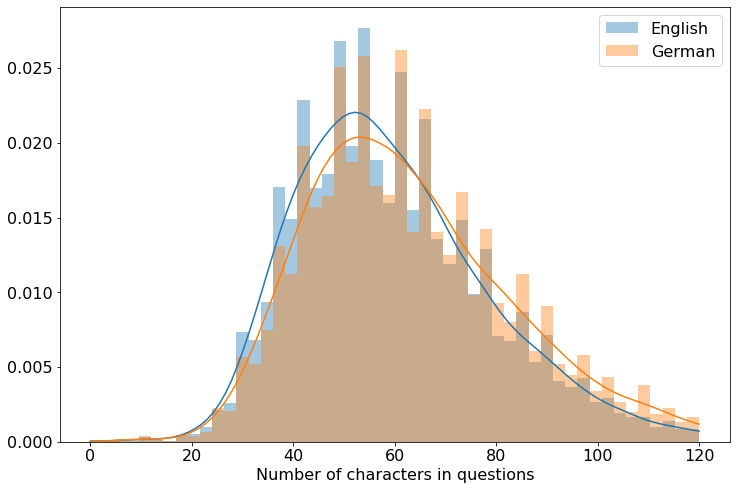

In [42]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12, 8))

sns.distplot(dbpedia_df.question.str.len(), label='English', kde_kws={"clip":(0,120)}, hist_kws={"range": [0,120]})
sns.distplot(dbpedia_df.question_de.str.len(), label='German', kde_kws={"clip":(0,120)}, hist_kws={"range": [0,120]})
#sns.distplot(dbpedia_df.question_fr.str.len(), label='French', kde_kws={"clip":(0,120)}, hist_kws={"range": [0,120]})
#sns.distplot(dbpedia_df.question_es.str.len(), label='Spanish', kde_kws={"clip":(0,120)}, hist_kws={"range": [0,120]})
#sns.distplot(dbpedia_df.question_ru.str.len(), label='Russian', kde_kws={"clip":(0,120)}, hist_kws={"range": [0,120]})
plt.xlabel("Number of characters in questions")
plt.legend();

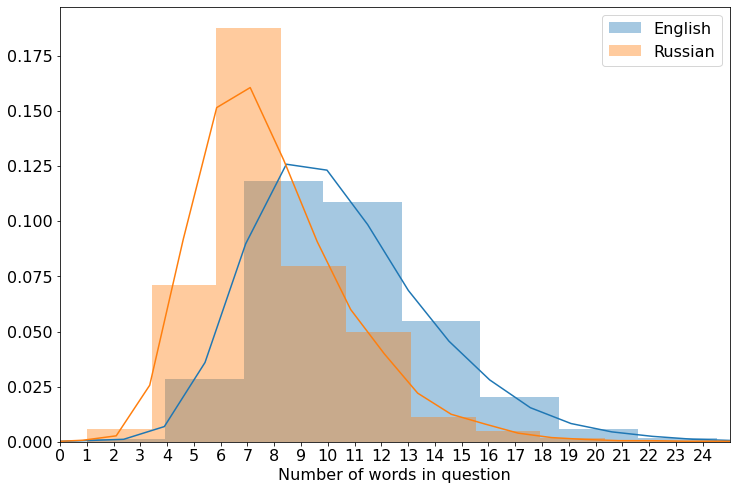

In [59]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12, 8))

sns.distplot(dbpedia_df.question.str.count(' ') + 1, label='English')
#sns.distplot(dbpedia_df.question_de.str.count(' ') + 1, label='German')
#sns.distplot(dbpedia_df.question_fr.str.count(' ') + 1, label='French')
#sns.distplot(dbpedia_df.question_es.str.count(' ') + 1, label='Spanish')
sns.distplot(dbpedia_df.question_ru.str.count(' ') + 1, label='Russian')
plt.xlim(0, 25)
plt.xticks([x for x in range(25)])
plt.xlabel("Number of words in question")
plt.legend()